In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# directories
TRAIN_DIR = "/kaggle/input/fruit-and-vegetable-image-recognition/train"
VALIDATION_DIR = "/kaggle/input/fruit-and-vegetable-image-recognition/validation"
TEST_DIR = "/kaggle/input/fruit-and-vegetable-image-recognition/test"

In [3]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [4]:
training_images = image_dataset_from_directory(
    TRAIN_DIR,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE
)

Found 3115 files belonging to 36 classes.


In [5]:
validation_images = image_dataset_from_directory(
    VALIDATION_DIR,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE
)

Found 351 files belonging to 36 classes.


In [6]:
testing_images = image_dataset_from_directory(
    TEST_DIR,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE
)

Found 359 files belonging to 36 classes.


In [7]:
class_names = training_images.class_names
class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
def normalize(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

training_images = training_images.map(normalize)
validation_images =  validation_images.map(normalize)
testing_images =  testing_images.map(normalize)

In [9]:
training_images = training_images.prefetch(tf.data.experimental.AUTOTUNE)
validation_images = validation_images.prefetch(tf.data.experimental.AUTOTUNE)
testing_images = testing_images.prefetch(tf.data.experimental.AUTOTUNE)

In [10]:
model = tf.keras.models.Sequential([
    # input layer
    tf.keras.Input(IMAGE_SIZE + (3,)),
    # preprocess layers
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomFlip('vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
    # CNN layers
    tf.keras.layers.Conv2D(32, kernel_size=(2,2), input_shape=[224,224,3], activation='selu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=(2,2), activation='selu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, kernel_size=(2,2), activation='selu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, kernel_size=(2,2), activation='selu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(1024, kernel_size=(2,2), activation='selu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    # max pooling layer
    tf.keras.layers.GlobalMaxPooling2D(),
    
    # output layer
    tf.keras.layers.Dense(36)
])
    
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 224, 224, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                     

In [12]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.85):
      self.model.stop_training = True

In [13]:
callback = MyCallback()

In [14]:
history = model.fit(
    training_images,
    validation_data=validation_images,
    epochs=100,
    callbacks=[callback]
)

Epoch 1/100
98/98 [==============================] - 57s 467ms/step - loss: 2.8418 - accuracy: 0.2350 - val_loss: 3.3070 - val_accuracy: 0.1083
Epoch 2/100
98/98 [==============================] - 46s 435ms/step - loss: 2.1411 - accuracy: 0.3849 - val_loss: 2.9177 - val_accuracy: 0.1880
Epoch 3/100
98/98 [==============================] - 45s 427ms/step - loss: 1.9625 - accuracy: 0.4318 - val_loss: 2.4568 - val_accuracy: 0.3219
Epoch 4/100
98/98 [==============================] - 46s 431ms/step - loss: 1.8279 - accuracy: 0.4754 - val_loss: 1.8928 - val_accuracy: 0.4729
Epoch 5/100
98/98 [==============================] - 45s 427ms/step - loss: 1.7145 - accuracy: 0.5075 - val_loss: 1.5130 - val_accuracy: 0.5726
Epoch 6/100
98/98 [==============================] - 45s 426ms/step - loss: 1.6214 - accuracy: 0.5329 - val_loss: 1.3226 - val_accuracy: 0.6211
Epoch 7/100
98/98 [==============================] - 45s 423ms/step - loss: 1.5862 - accuracy: 0.5387 - val_loss: 1.2263 - val_accuracy:

In [15]:
model.save('capstone_v2.h5')
model.save('capstone_v2.keras')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


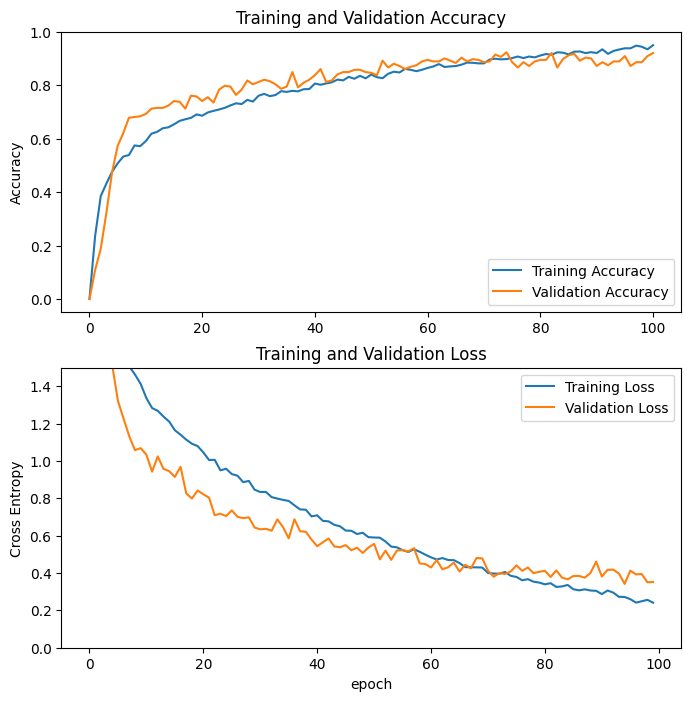

In [16]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [17]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [18]:
download_file('/kaggle/working', 'gelu')

/kaggle/working/gelu.zip